In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
Fao_1= pd.read_csv('FAOSTAT_data_7-17-2019.csv')
Fao_1.head(100)
Fao = Fao_1.set_index("Element")
Fao= Fao.drop("Import Quantity", axis=0) # Delete all rows with label "Import Quantity"
Fao= Fao.drop("Export Quantity", axis=0) # Delete all rows with label "Export Quantity"
Fao

,Domain Code,Domain,Area Code,Area,Element Code,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Element,,,,,,,,,,,,,
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1961,1961,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1962,1962,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1963,1963,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1964,1964,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1965,1965,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1966,1966,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1967,1967,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1968,1968,1000 US$,0.0,NaN,Official data
Import Value,TP,Crops and livestock products,114,Kenya,5622,862,Alfalfa meal and pellets,1969,1969,1000 US$,0.0,NaN,Official data


In [147]:
Fao.reset_index(level=0, inplace=True)

In [148]:
Fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33718 entries, 0 to 33717
Data columns (total 14 columns):
Element             33718 non-null object
Domain Code         33718 non-null object
Domain              33718 non-null object
Area Code           33718 non-null int64
Area                33718 non-null object
Element Code        33718 non-null int64
Item Code           33718 non-null int64
Item                33718 non-null object
Year Code           33718 non-null int64
Year                33718 non-null int64
Unit                33718 non-null object
Value               26087 non-null float64
Flag                12382 non-null object
Flag Description    33718 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 3.6+ MB


In [149]:
Fao.drop(['Domain Code' , 'Domain' , 'Area Code', 'Area', 'Year Code', 'Flag' ], axis = 1, inplace = True)
Fao.head()

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description
0,Import Value,5622,862,Alfalfa meal and pellets,1961,1000 US$,0.0,Official data
1,Import Value,5622,862,Alfalfa meal and pellets,1962,1000 US$,0.0,Official data
2,Import Value,5622,862,Alfalfa meal and pellets,1963,1000 US$,0.0,Official data
3,Import Value,5622,862,Alfalfa meal and pellets,1964,1000 US$,0.0,Official data
4,Import Value,5622,862,Alfalfa meal and pellets,1965,1000 US$,0.0,Official data


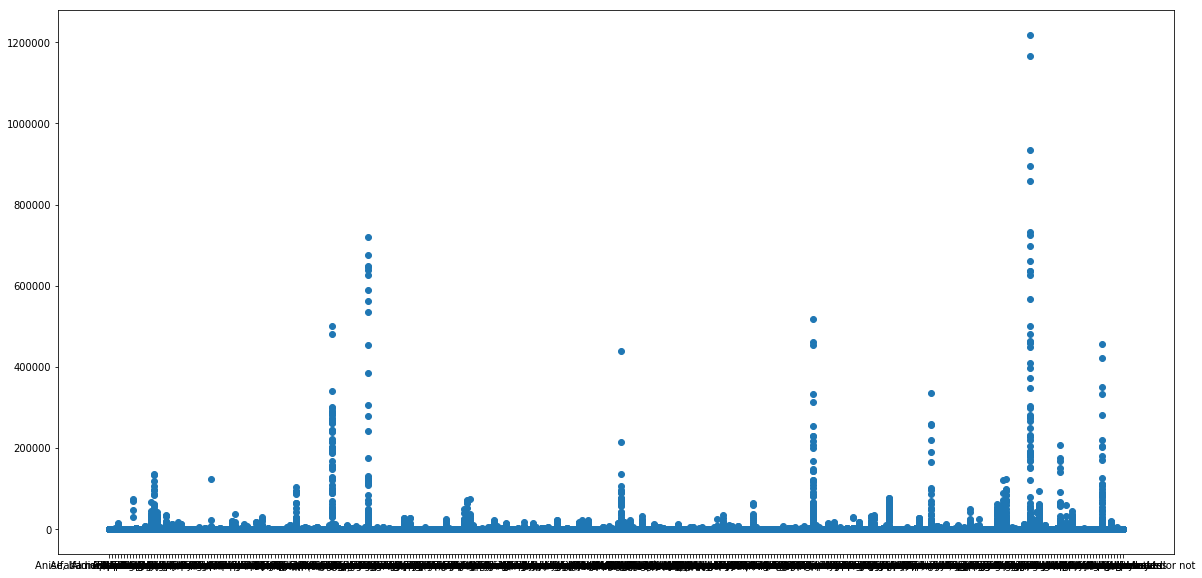

In [150]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(Fao['Item'], Fao['Value'])

plt.show()

In [151]:
Fao.isnull().values.any()

True

In [152]:
Fao.isnull().sum()

Element                0
Element Code           0
Item Code              0
Item                   0
Year                   0
Unit                   0
Value               7631
Flag Description       0
dtype: int64

In [153]:
Fao['Value'].fillna(0, inplace=True)
Fao.tail()

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description
33713,Export Value,5922,892,"Yoghurt, concentrated or not",2012,1000 US$,76.0,Estimated data using trading partners database
33714,Export Value,5922,892,"Yoghurt, concentrated or not",2013,1000 US$,279.0,Official data
33715,Export Value,5922,892,"Yoghurt, concentrated or not",2014,1000 US$,262.0,Estimated data using trading partners database
33716,Export Value,5922,892,"Yoghurt, concentrated or not",2015,1000 US$,76.0,Estimated data using trading partners database
33717,Export Value,5922,892,"Yoghurt, concentrated or not",2016,1000 US$,0.0,Official data


In [154]:
Fao[Fao.duplicated()]

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description


In [106]:
items=Fao.Item.unique()
items


array(['Alfalfa meal and pellets', 'Almonds shelled',
       'Anise, badian, fennel, coriander', 'Apples', 'Apricots',
       'Apricots, dry', 'Artichokes', 'Asparagus', 'Avocados',
       'Bacon and ham', 'Bambara beans', 'Bananas', 'Barley',
       'Barley, pearled', 'Beans, dry', 'Beans, green', 'Beer of barley',
       'Beeswax', 'Beet pulp', 'Beverages, distilled alcoholic',
       'Beverages, fermented rice', 'Beverages, non alcoholic',
       'Blueberries', 'Bran, maize', 'Bran, wheat',
       'Brazil nuts, shelled', 'Bread', 'Broad beans, horse beans, dry',
       'Buckwheat', 'Bulgur', 'Butter, cow milk',
       'Buttermilk, curdled, acidified milk',
       'Cabbages and other brassicas', 'Cake, copra', 'Cake, cottonseed',
       'Cake, groundnuts', 'Cake, linseed', 'Cake, maize',
       'Cake, palm kernel', 'Cake, rapeseed', 'Cake, sesame seed',
       'Cake, soybeans', 'Cake, sunflower', 'Canary seed',
       'Carrots and turnips', 'Cashew nuts, shelled',
       'Cashew nuts

In [157]:
Fao.Value.min()

0.0

In [158]:
Fao_order=Fao.sort_values(by=['Value'], ascending=False)
Fao_order.head()

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description
30377,Export Value,5922,667,Tea,2013,1000 US$,1218039.0,Official data
30374,Export Value,5922,667,Tea,2010,1000 US$,1165137.0,Official data
30372,Export Value,5922,667,Tea,2008,1000 US$,934921.0,Official data
30373,Export Value,5922,667,Tea,2009,1000 US$,894027.0,Official data
30375,Export Value,5922,667,Tea,2011,1000 US$,858250.0,Estimated data using trading partners database


In [159]:
Fao['total_value']=0
Fao.head()

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
0,Import Value,5622,862,Alfalfa meal and pellets,1961,1000 US$,0.0,Official data,0
1,Import Value,5622,862,Alfalfa meal and pellets,1962,1000 US$,0.0,Official data,0
2,Import Value,5622,862,Alfalfa meal and pellets,1963,1000 US$,0.0,Official data,0
3,Import Value,5622,862,Alfalfa meal and pellets,1964,1000 US$,0.0,Official data,0
4,Import Value,5622,862,Alfalfa meal and pellets,1965,1000 US$,0.0,Official data,0


In [160]:
#To calculate the total value of each 
if 'Unit'=='1000 US$' in Fao.columns: 
    Fao['total_value'] = Fao['Value']*1000
else :
    Fao['total_value'] = Fao['Value']*1000
Fao.head(100)

,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
0,Import Value,5622,862,Alfalfa meal and pellets,1961,1000 US$,0.0,Official data,0.0
1,Import Value,5622,862,Alfalfa meal and pellets,1962,1000 US$,0.0,Official data,0.0
2,Import Value,5622,862,Alfalfa meal and pellets,1963,1000 US$,0.0,Official data,0.0
3,Import Value,5622,862,Alfalfa meal and pellets,1964,1000 US$,0.0,Official data,0.0
4,Import Value,5622,862,Alfalfa meal and pellets,1965,1000 US$,0.0,Official data,0.0
5,Import Value,5622,862,Alfalfa meal and pellets,1966,1000 US$,0.0,Official data,0.0
6,Import Value,5622,862,Alfalfa meal and pellets,1967,1000 US$,0.0,Official data,0.0
7,Import Value,5622,862,Alfalfa meal and pellets,1968,1000 US$,0.0,Official data,0.0
8,Import Value,5622,862,Alfalfa meal and pellets,1969,1000 US$,0.0,Official data,0.0
9,Import Value,5622,862,Alfalfa meal and pellets,1970,1000 US$,0.0,Official data,0.0


In [161]:
#The product with the highest value between both imports and exports
max_val=Fao.total_value.max()
print("The maximum value is ", max_val)
prod = Fao[Fao['total_value'] == max_val]
prod

The maximum value is  1218039000.0


,Element,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
30377,Export Value,5922,667,Tea,2013,1000 US$,1218039.0,Official data,1.218039e+09


In [179]:
#The products with the highest import values
import_table= Fao.set_index("Element")
import_tab= import_table.drop("Export Value", axis=0) # Delete all rows with label "Export Value"
import_tab.head()

,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
Element,,,,,,,,
Import Value,5622,862,Alfalfa meal and pellets,1961,1000 US$,0.0,Official data,0.0
Import Value,5622,862,Alfalfa meal and pellets,1962,1000 US$,0.0,Official data,0.0
Import Value,5622,862,Alfalfa meal and pellets,1963,1000 US$,0.0,Official data,0.0
Import Value,5622,862,Alfalfa meal and pellets,1964,1000 US$,0.0,Official data,0.0
Import Value,5622,862,Alfalfa meal and pellets,1965,1000 US$,0.0,Official data,0.0


In [177]:
#The head shows Items that have the highest import values
import_value = import_tab.sort_values(['Value'], ascending=False)
import_value.head()

,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
Element,,,,,,,,
Import Value,5622,257,"Oil, palm",2013,1000 US$,518819.0,Official data,518819000.0
Import Value,5622,257,"Oil, palm",2008,1000 US$,462145.0,Official data,462145000.0
Import Value,5622,15,Wheat,2011,1000 US$,457146.0,Estimated data using trading partners database,457146000.0
Import Value,5622,257,"Oil, palm",2010,1000 US$,452821.0,Official data,452821000.0
Import Value,5622,56,Maize,2009,1000 US$,439246.0,Official data,439246000.0


In [180]:
#The product with the highest export value
export_table= Fao.set_index("Element")
export_tab= export_table.drop("Import Value", axis=0) # Delete all rows with label "Import Value"
export_tab.head()

,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
Element,,,,,,,,
Export Value,5922,862,Alfalfa meal and pellets,1961,1000 US$,0.0,Official data,0.0
Export Value,5922,862,Alfalfa meal and pellets,1962,1000 US$,0.0,Official data,0.0
Export Value,5922,862,Alfalfa meal and pellets,1963,1000 US$,0.0,Official data,0.0
Export Value,5922,862,Alfalfa meal and pellets,1964,1000 US$,0.0,Official data,0.0
Export Value,5922,862,Alfalfa meal and pellets,1965,1000 US$,0.0,Official data,0.0


In [192]:
#The head shows Items that have the highest export values
export_value = export_tab.sort_values(['Value'], ascending=False)
export_value.head()

,Element Code,Item Code,Item,Year,Unit,Value,Flag Description,total_value
Element,,,,,,,,
Export Value,5922,667,Tea,2013,1000 US$,1218039.0,Official data,1.218039e+09
Export Value,5922,667,Tea,2010,1000 US$,1165137.0,Official data,1.165137e+09
Export Value,5922,667,Tea,2008,1000 US$,934921.0,Official data,9.349210e+08
Export Value,5922,667,Tea,2009,1000 US$,894027.0,Official data,8.940270e+08
Export Value,5922,667,Tea,2011,1000 US$,858250.0,Estimated data using trading partners database,8.582500e+08


In [196]:
items= export_value['Item'].unique()
items

array(['Tea', 'Crude materials', 'Coffee, green', 'Vegetables, fresh nes',
       'Beans, green', 'Cigarettes', 'Oil, palm', 'Pineapples canned',
       'Avocados', 'Nuts, nes', 'Sugar confectionery',
       'Tobacco, unmanufactured', 'Beans, dry',
       'Vegetables, preserved nes', 'Beer of barley',
       'Tobacco products nes', 'Maize', 'Sugar Raw Centrifugal',
       'Peas, green', 'Margarine, short', 'Fat, nes, prepared',
       'Pyrethrum, extraction', 'Food prep nes', 'Tea, mate extracts',
       'Flour, wheat', 'Juice, fruit nes',
       'Rice - total  (Rice milled equivalent)',
       'Mangoes, mangosteens, guavas', 'Jute',
       'Fruit, tropical fresh nes', 'Juice, pineapple, concentrated',
       'Vegetables, frozen', 'Juice, pineapple',
       'Cauliflowers and broccoli', 'Sugar refined',
       'Beverages, distilled alcoholic', 'Maize, green',
       'Hides, cattle, wet salted', 'Meat, goat', 'Bran, wheat',
       'Meat, beef, preparations', 'Peas, dry', 'Cashew nuts, sh

In [198]:
# Total import value 1000 US$
Fao[(Fao['Element'] == 'Import Value')]['total_value'].sum()

27097616000.0

In [199]:
# Total Export value 1000 US$
Fao[(Fao['Element'] == 'Export Value')]['total_value'].sum()

55408986000.0